# Create dataframes for image loader

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import os


import torch
from skimage import io, transform
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from torchvision import datasets
from torchvision.transforms import ToTensor
import cv2
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader, random_split, TensorDataset, Dataset, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torchvision import models
from torchmetrics.classification import BinaryF1Score, BinaryPrecision, BinaryRecall, BinaryAccuracy, BinaryROC, BinaryAUROC
import PIL
from PIL import Image

# visualisation
import seaborn as sns

# helpers
from tqdm import tqdm
import time
import copy
import gc
from enum import Enum

import warnings
warnings.filterwarnings('ignore')

metadata_list=['mass_case_description_test_set','mass_case_description_train_set']
#'mass_case_description_test_set','mass_case_description_train_set',
df_list=[]
for j in range(len(metadata_list)):
    print (metadata_list[j])
    df=pd.read_csv('/home/mbadhan/Desktop/mberghouse/'+metadata_list[j]+'.csv')
    print (len(df))
    
    fname=[]

    df=df.rename(columns={"file path": "filename","pathology":"class", 'image file path':'filename','cropped image file path':'patch_filename'})
###Remove multiple-counted images for whole image
    for k in range(len(df)):
        fname.append(df['filename'].loc[k])
        if k>0:
            if fname[k] == fname[k-1]:
                df.drop(k, inplace=True)
    print ('df length after removal of repeats: ', len(df))
    
    
    nan_count=0

    for i in range(len(df)):
### For whole images
        df.filename.iloc[i]='/home/mbadhan/Desktop/mberghouse/CBIS-DDSM-preprocessed/600x1000_v1_lightclahe/'+df.filename.iloc[i].rsplit('/',3)[0]+'/1-1.png'
        #df.filename[i]='F:/CBIS_DDSM_redo/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-png/'+df.filename[i].rsplit('/',3)[0]+'/1-1.png'
        if 'MALIGNANT' in df['class'].iloc[i]:
            df['class'].iloc[i]=1
        else:
            df['class'].iloc[i]=0
    df_list.append(df)
    
### For patches
        ##i=i-nan_count
       ## df.filename.iloc[i]='C:/Users/marcb/Desktop/CBIS-DDSM-preprocessed/v4_3d/'+df.filename.iloc[i].rsplit('/',3)[0]+'/1-1.jpg'
        ##df.filename[i]='F:/CBIS_DDSM_redo/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-png/'+df.filename[i].rsplit('/',3)[0]+'/1-1.png'
### For Masses
#         try:
#             path1 = 'F:/CBIS_DDSM/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-mask/'+df.patch_filename.iloc[i].rsplit('/',3)[0]
#             folder1=os.listdir(path1)[0]
#             folder2=os.listdir(os.path.join(path1,folder1))[0]
#             img = os.listdir(os.path.join(path1,folder1,folder2))
#             im0_path=os.path.join(path1,folder1,folder2,img[0])
#             im0=cv2.imread(im0_path)
#             if len(img)>1:
#                 if np.median(im0)==0:
#                     img_path = os.path.join(path1,folder1,folder2,img[1])
#                 else:
#                     img_path = im0_path
#             else:
#                 if np.median(im0)==0:
#                     img_path = np.nan
#                     nan_count = nan_count+1
#                 else:
#                     img_path = im0_path
#             df.patch_filename.iloc[i]=img_path
#         except:
#             path1 = 'F:/CBIS_DDSM/manifest-ZkhPvrLo5216730872708713142/cropped/'+df.patch_filename.iloc[i].rsplit('/',3)[0]
#             folder1=os.listdir(path1)[0]
#             folder2=os.listdir(os.path.join(path1,folder1))[0]
#             img = os.listdir(os.path.join(path1,folder1,folder2))
#             im0_path=os.path.join(path1,folder1,folder2,img[0])
#             im0=cv2.imread(im0_path)
#             if len(img)>1:               
#                 if np.median(im0)==0:
#                     img_path = os.path.join(path1,folder1,folder2,img[1])
#                 else:
#                     img_path = im0_path
#             else:
#                 if np.median(im0)==0:
#                     img_path = np.nan
#                     nan_count = nan_count+1
#                 else:
#                     img_path = im0_path
#             df.patch_filename.iloc[i]=img_path
#             #df.dropna(inplace=True)
        
#         if 'MALIGNANT' in df['class'].iloc[i]:
#             df['class'].iloc[i]=1
#         else:
#             df['class'].iloc[i]=0
#     df.dropna(inplace=True)
#     df_list.append(df)
#df_list
# df_mass_test=df_list[0]
# df_mass_train=df_list[1]
df_calc_test=df_list[0]
df_calc_train=df_list[1]

# filenames=[]
# labels=[]
# for i in range(len(df_mass_train)):
#     filenames.append(df_mass_train.filename.iloc[i])
#     labels.append(df_mass_train['class'].iloc[i])

# filenames_test=[]
# labels_test=[]
# for i in range(len(df_mass_test)):
#     filenames_test.append(df_mass_test.filename.iloc[i])
#     labels_test.append(df_mass_test['class'].iloc[i])
    
# filenames_calc=[]
# labels_calc=[]
# for i in range(len(df_calc_train)):
#     filenames_calc.append(df_calc_train.filename.iloc[i])
#     labels_calc.append(df_calc_train['class'].iloc[i])

# filenames_test_calc=[]
# labels_test_calc=[]
# for i in range(len(df_calc_test)):
#     filenames_test_calc.append(df_calc_test.filename.iloc[i])
#     labels_test_calc.append(df_calc_test['class'].iloc[i])

mass_case_description_test_set
378
df length after removal of repeats:  361
mass_case_description_train_set
1318
df length after removal of repeats:  1231


In [2]:
filenames_calc=[]
labels_calc=[]
for i in range(len(df_calc_train)):
    filenames_calc.append(df_calc_train.filename.iloc[i])
    labels_calc.append(df_calc_train['class'].iloc[i])

filenames_test_calc=[]
labels_test_calc=[]
for i in range(len(df_calc_test)):
    filenames_test_calc.append(df_calc_test.filename.iloc[i])
    labels_test_calc.append(df_calc_test['class'].iloc[i])

In [3]:
len(filenames_calc)

1231

In [4]:
# count=0
# for i in filenames_calc:
#     if i == np.nan:
#         filenames_calc.pop(count)
#         labels_calc.pop(count)
#     count=count+1

# count=0
# for i in filenames_test_calc:
#     if i == np.nan:
#         filenames_test_calc.pop(count)
#         labels_test_calc.pop(count)
#     count=count+1

In [5]:

import torchvision
import numpy.matlib as np_mlb
#torchvision.disable_beta_transforms_warning()
#import torchvision.transforms.v2 as transforms

#plt.ion()   # interactive mode

##########################################
##### HERE ARE THE AUGMENTATIONS!!! ######
##########################################
# affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))

augmentator = transforms.Compose([
    # input for augmentator is always PIL image
    transforms.ToPILImage(),
    
    transforms.ColorJitter(brightness=(.6,1.2)),
#     transforms.Pad(10),
    #torchvision.models.EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms(),
#     transforms.RandomAdjustSharpness(1.1, p=0.5),
#     transforms.RandomPhotometricDistort(),
    #transforms.RandomZoomOut(fill = 0, side_range = (1, 1.3)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomRotation(8),
#     transforms.RandomAffine(degrees=(0,5),translate=(0.0, 0.05),  shear=(.2,.2)),
  #  transforms.GaussianBlur(kernel_size=(3, 3), sigma=(.5)),
#     transforms.RandomEqualize(p=.1),
#    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    #transforms.ConvertImageDtype(torch.float32),# return it as a tensor and transforms it to [0, 1]
])

small_aug = transforms.Compose([
    # input for augmentator is always PIL image
    transforms.ToPILImage(),
    #transforms.Pad(10),
    #torchvision.models.EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms()
    transforms.ToTensor(),
    #transforms.v2.ConvertImageDtype(torch.float32)# return it as a tensor and transforms it to [0, 1]
])

def show_landmarks(image, label):
    """Show image with landmarks"""
    plt.imshow(image)
    if label==0:
        classif='Benign'
    else:
        classif='Malignant'
    print ('Class: ',classif)
    plt.pause(0.001)  # pause a bit so that plots are updated

class CBISDataset(Dataset):
    """CBIS-DDSM dataset."""

    def __init__(self, labels, filenames, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = labels
        self.filenames = filenames
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        fname = self.filenames[idx]
        image = cv2.imread(fname)
#         image = cv2.resize(image, (344,344))
#         image = (((image-np.min(image))/(np.max(image)-np.min(image)))*255).astype('uint8')
#         clahe = cv2.createCLAHE(clipLimit = 2,tileGridSize=(12,12))
#         image = clahe.apply(image[:,:,0])
#         image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
       # image = torchvision.io.read_image(fname)#, torchvision.io.ImageReadMode.RGB)
       # image = image.repeat([3, 1, 1])
        label = self.labels[idx]    
        if self.transform:
            image = self.transform(image)

        return image, label

In [6]:
fname

['Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm',
 'Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.dcm',
 'Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.dcm',
 'Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.dcm',
 'Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.dcm',
 'Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.348094436212980762312744999743818171955/1.3.6.1.4.1.9590.100.1.2

In [7]:
# filenames_calc.pop(375)
# filenames_calc.pop(494)
# filenames_calc.pop(705)
# filenames_calc.pop(928)
# filenames_calc.pop(928)
# filenames_calc.pop(928)
# labels_calc.pop(375)
# labels_calc.pop(494)
# labels_calc.pop(705)
# labels_calc.pop(928)
# labels_calc.pop(928)
# labels_calc.pop(928)

In [8]:
# filenames_calc.pop(520)
# filenames_calc.pop(520)
# filenames_calc.pop(838)
# filenames_calc.pop(1107)
# filenames_calc.pop(1107)

# labels_calc.pop(520)
# labels_calc.pop(520)
# labels_calc.pop(838)
# labels_calc.pop(1107)
# labels_calc.pop(1107)

In [9]:
dataset = CBISDataset(labels_calc,filenames_calc,transform=augmentator)

val_pct = 0.001
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
test_dataset = CBISDataset(labels_test_calc,filenames_test_calc, transform=small_aug)
val_size =  len(val_dataset)
train_size = len(train_dataset)

In [10]:
# print (val_size, len(labels_test_calc),train_size, len(labels_calc))
# for i in range(len(labels_test_calc)):
#     if labels_test_calc[i] == 1:
#         print (filenames_test_calc[i])

In [11]:
batch_size = 14
#try pin memory = False

# Create data loaders.
#train_dataloader = DataLoader(dataset, batch_size=batch_size,
#                        shuffle=True)#, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False, pin_memory = True,num_workers=14)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True, pin_memory = True,num_workers=14 )
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle = True, pin_memory = True,num_workers=14)


for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    #img=X
    break

Shape of X [N, C, H, W]: torch.Size([14, 3, 1000, 600])
Shape of y: torch.Size([14]) torch.int64


In [12]:
# plt.figure(figsize=(4,4),dpi=200)
# plt.imshow(X[0,:,:,:].permute(1, 2, 0)[:,:,0])
# X
# # torch.min(X[0,0,:,:])
# torch.min(X[0])
# idx
fname

['Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm',
 'Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.dcm',
 'Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.dcm',
 'Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.dcm',
 'Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.dcm',
 'Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.348094436212980762312744999743818171955/1.3.6.1.4.1.9590.100.1.2

There are 6.0 negative and 8.0 positive samples in this batch.


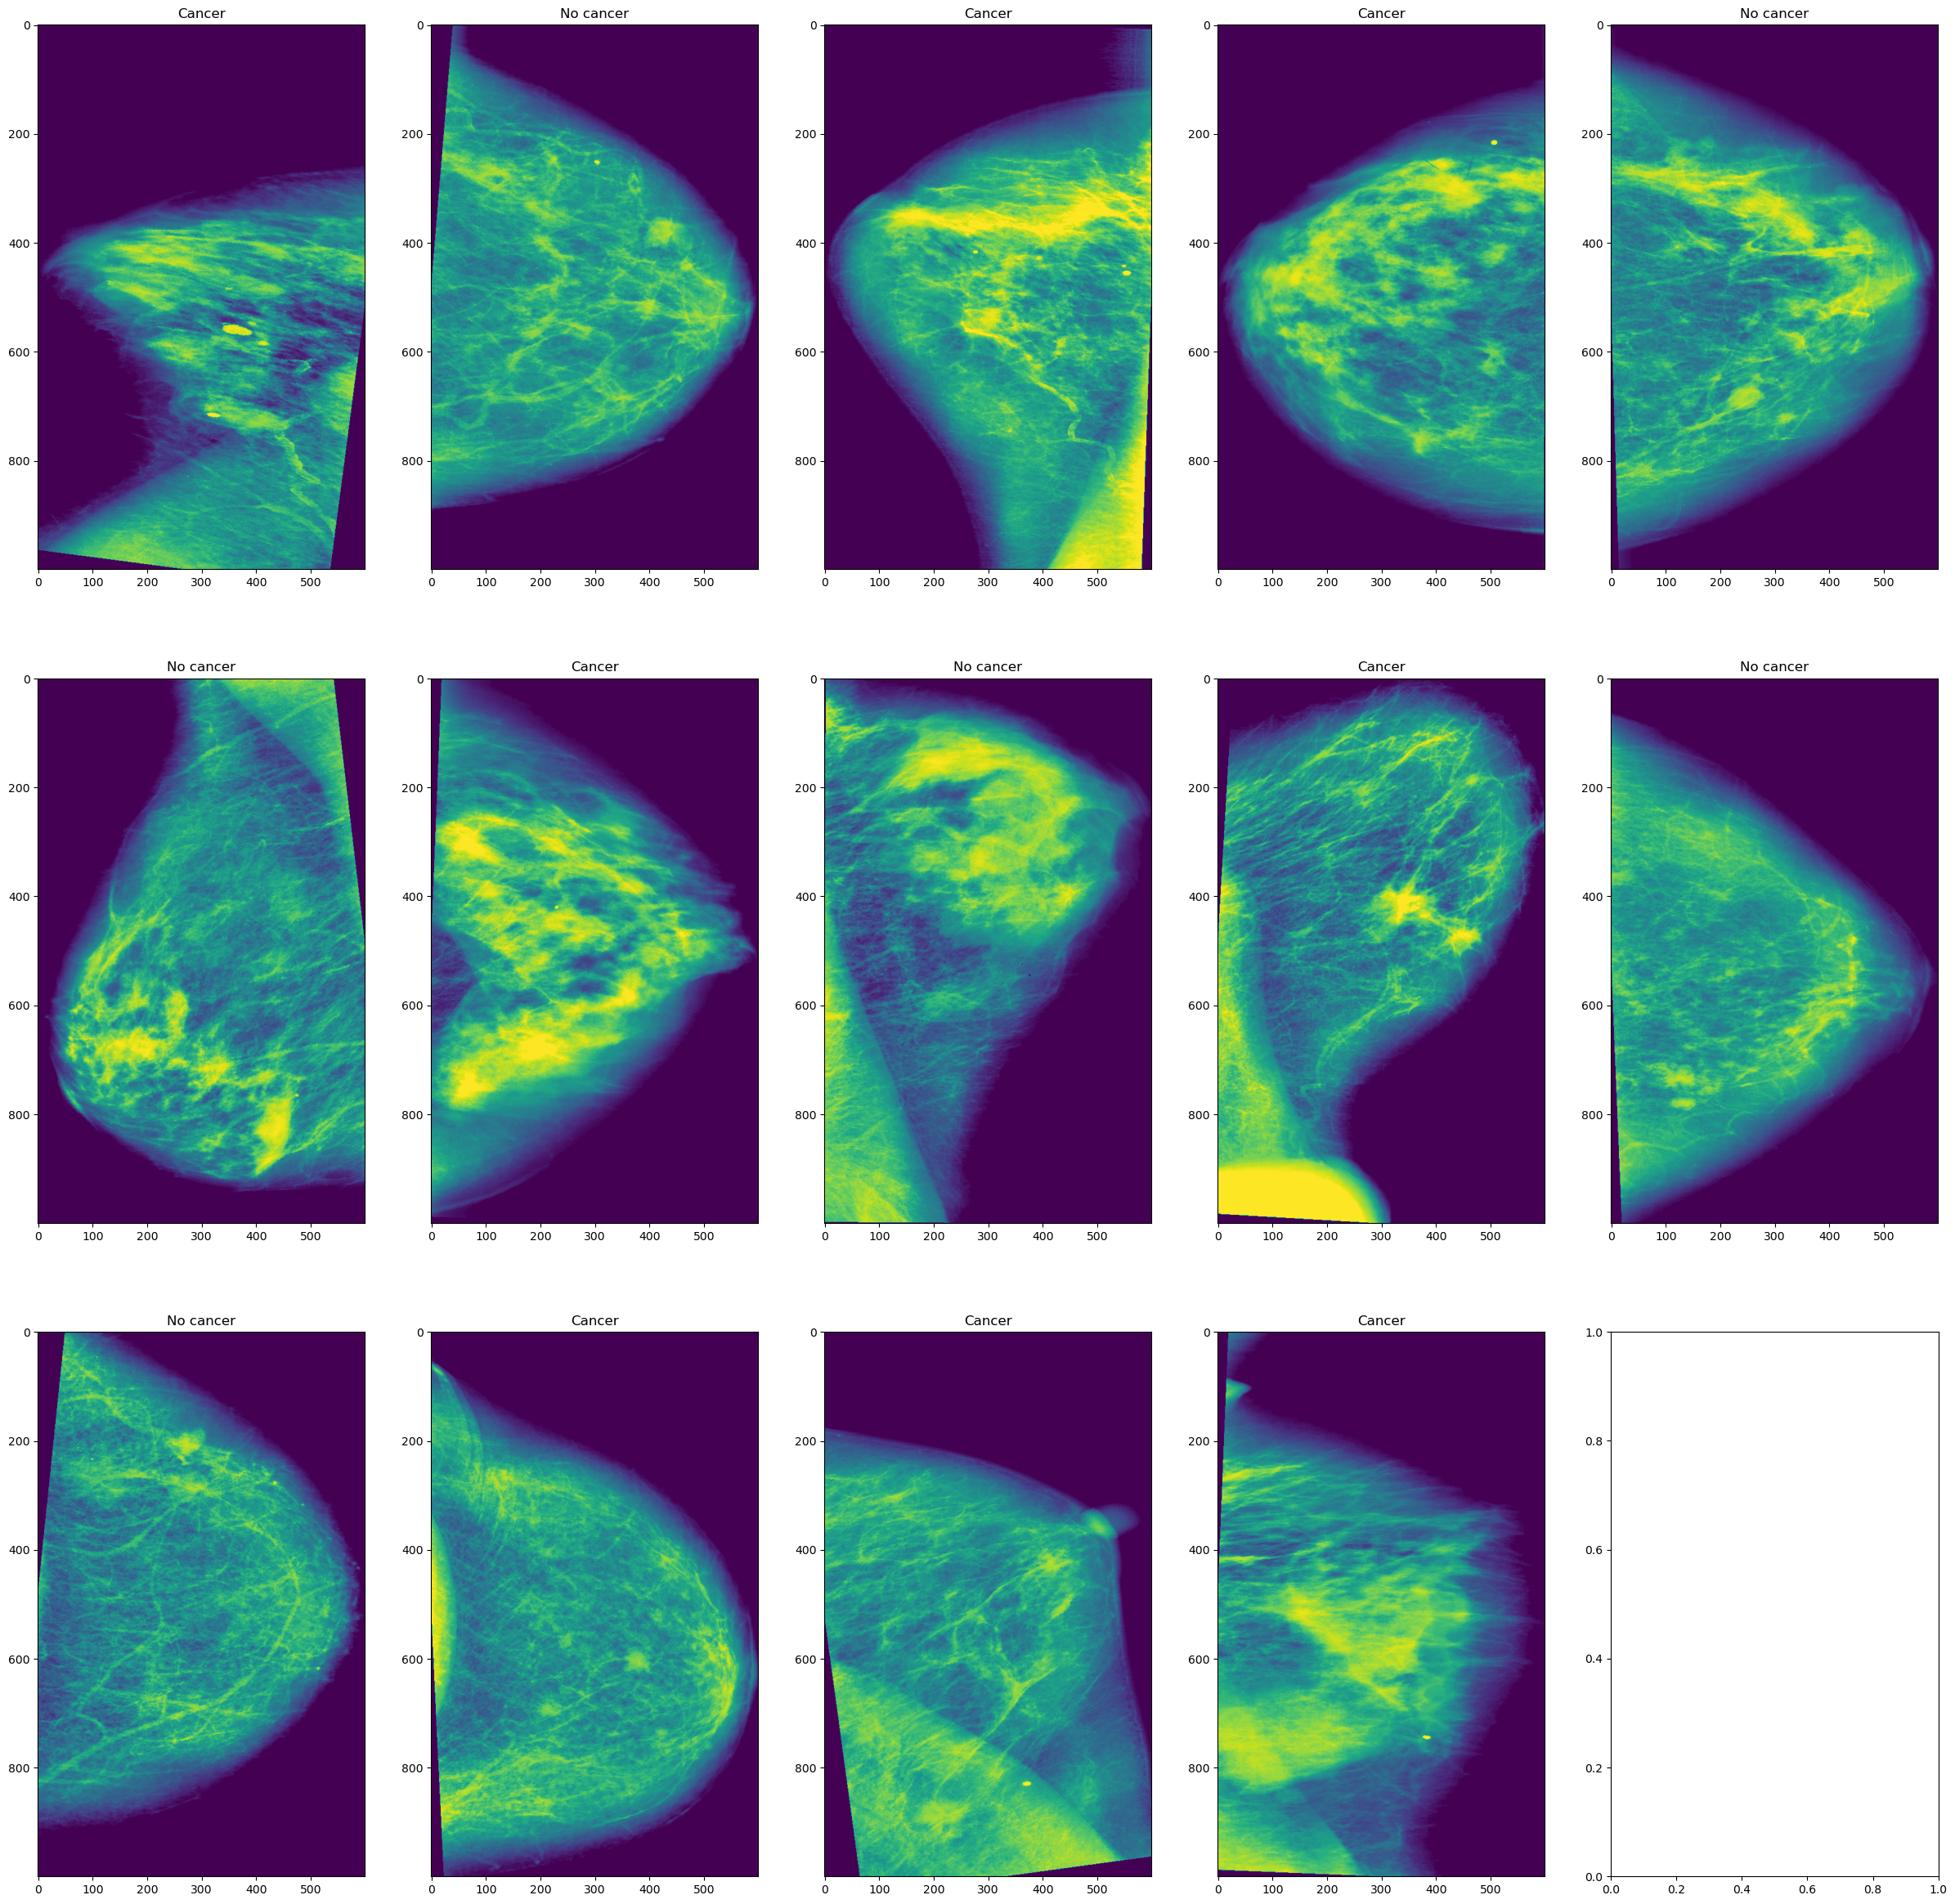

In [13]:
rows = 3
cols = 5
plt.subplots(rows, cols, figsize = (30, 30),dpi=100)

batch_imgs, batch_labels = next(iter(train_dataloader))
i = 0
for img in batch_imgs:
    
    if i >= rows*cols:
        break
    plt.subplot(rows, cols, i + 1)
    #plt.figure(figsize=(6,6),dpi=300)
    plt.title("Cancer" if batch_labels[i] == 1 else "No cancer")
    
    plt.imshow(img.permute(1, 2, 0)[:,:,0])

    i += 1

labels_count = np.zeros(2)
for l in batch_labels:
    labels_count[l] += 1 
    
    
print(f'There are {labels_count[0]} negative and {labels_count[1]} positive samples in this batch.')

# Weights and Biases Setup

In [14]:
import wandb
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Mass_CBAMresnet50_600x1000_baseline_test",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 1e-5,
    "architecture": "CBAMresnet50",
    "dataset": "CBIS-DDSM - mass",
    "epochs": 120,
    "batch size": 32,
    "misc": "custom staircase restart LR with NAdam and .3 dropout",
    "trainable": "Class + CBAM for 15 epochs, all layers for 30 epochs"
    }
)

wandb: Currently logged in as: mberghouse (mammogram_project). Use `wandb login --relogin` to force relogin


In [15]:

    
    
# create class for earlystopping
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_loss = np.inf

    def early_stop(self, loss):
        if loss <= self.min_loss:
            self.min_loss = loss
            self.counter = 0
        elif loss > (self.min_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False
    
    
def BCELoss_class_weighted(weights):
    """
    weights[0] is weight for class 0 (negative class)
    weights[1] is weight for class 1 (positive class)
    """
    def loss(y_pred, target):
        y_pred = torch.clamp(y_pred,min=1e-7,max=1-1e-7) # for numerical stability
        bce = - weights[1] * target * torch.log(y_pred) - (1 - target) * weights[0] * torch.log(1 - y_pred)
        return torch.mean(bce)

    return loss

def find_optim_thres(fpr, tpr, thresholds):
    optim_thres = thresholds[0]
    inx = 0
    min_dist = 1.0
    for i in range(len(fpr)):
        dist = np.linalg.norm(np.array([0.0, 1.0]) - np.array([fpr[i], tpr[i]]))
        if dist < min_dist:
            min_dist = dist
            optim_thres = thresholds[i]
            inx = i
            
    return optim_thres, inx


In [16]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    scheduler1=scheduler[1]
    scheduler=scheduler[0]
    since = time.time()
    metricf1 = BinaryF1Score()
    precision = BinaryPrecision()
    recall = BinaryRecall()
    accuracy = BinaryAccuracy()
    roc = BinaryROC()
    auc = BinaryAUROC()
    best_model_wts = model.state_dict()
    stop_count = 0
    best_f1 = -1.0
    train_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    val_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
    threshold = 0.5
    sched_steps=[]
    print('Starting training...')
    print('-' * 20)
    for epoch in range(num_epochs):
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            # empty 'all' tensors for saving
            # for calculating aoc at the end of epoch, and for calculating new threshold
            all_outputs = torch.Tensor([])
            all_labels = torch.Tensor([])
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            n_samples = 0
            n_correct = 0
            running_f1 = 0.0
            # Iterate over data.
            print(f'{phase} for epoch {epoch + 1}')
            for inputs, labels in tqdm(dataloaders[phase]):
                labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
                #labels=torch.tensor(labels)
                inputs = inputs.float()
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    preds = (outputs > threshold).double()
                    #print(all_outputs)
                    #print(outputs)
                    # concatenating all outputs and labels for calculation aoc and new threshold
                    all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
                    all_labels = torch.cat((all_labels, labels.to('cpu')))                  
                    #print(labels)
                    # _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step()
                        scheduler1.step()
#                         start=scheduler.state_dict()
                        sched_steps.append(optimizer.param_groups[0]['lr'])
#                         if epoch == 18:
#                             lower=scheduler.state_dict()
#                         if epoch ==40:
# #                             optimizer = torch.optim.NAdam(model.parameters(), lr=1e-5, weight_decay=.1)
# #                             scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 1600, T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)

#                             for name, param in model.named_parameters():
#                                 param.requires_grad = True
#                         if epoch ==60:
#                             optimizer.param_groups[0]['lr']=1e-5
#                             scheduler.load_state_dict(start)


                running_loss += loss.item()
                # collect any unused memmory
                gc.collect()
                torch.cuda.empty_cache()           
            # statistics
            epoch_loss = running_loss / len(dataloaders[phase])            
            # find true positive and false positive rates for ROC curve
            #print ('outputs: ', all_outputs, 'labels', all_labels)
            all_labels=all_labels.to(dtype=torch.long)
            fpr, tpr, thresholds = roc(all_outputs, all_labels)
            epoch_auc = auc(all_outputs, all_labels)
            # find new threshold
            threshold, _ = find_optim_thres(fpr, tpr, thresholds)
            print(f'New threshold is {threshold}')
            # calculate metrics using new optimized threshold
            epoch_f1 = metricf1(all_outputs > threshold, all_labels)
            epoch_acc = accuracy(all_outputs > threshold, all_labels)
            epoch_precision = precision(all_outputs > threshold, all_labels)
            epoch_recall = recall(all_outputs > threshold, all_labels)
            print(f'{phase} F1 is {epoch_f1}')            
            # save all of the statistics for latter analysis
            if phase == 'train':
                wandb.log({"train_acc": epoch_acc, "train_loss": epoch_loss, "train_f1": epoch_f1, "train_precision": epoch_precision
                           , "train_recall": epoch_recall, "train_auc": epoch_auc})
                train_metrics['loss'].append(epoch_loss)
                train_metrics['acc'].append(epoch_acc)
                train_metrics['f1'].append(epoch_f1)
                train_metrics['precision'].append(epoch_precision)
                train_metrics['recall'].append(epoch_recall)
                train_metrics['auc'].append(epoch_auc)
            else:
                wandb.log({"val_acc": epoch_acc, "val_loss": epoch_loss, "val_f1": epoch_f1, "val_precision": epoch_precision
                           , "val_recall": epoch_recall, "val_auc": epoch_auc})
                val_metrics['loss'].append(epoch_loss)
                val_metrics['acc'].append(epoch_acc)
                val_metrics['f1'].append(epoch_f1)
                val_metrics['precision'].append(epoch_precision)
                val_metrics['recall'].append(epoch_recall)
                val_metrics['auc'].append(epoch_auc)

            # deep copy the model
                if val_metrics['f1'][-1] > best_f1:
                    best_f1 = val_metrics['f1'][-1]
                    best_model_wts = model.state_dict()
                    checkpoint['threshold'] = threshold
                    torch.save(checkpoint, 'checkpoint.pth')
               
        # cant be formated in strin g
        tr_loss, tr_acc, tr_f1, tr_prec, tr_rec, tr_auc = train_metrics['loss'][-1], train_metrics['acc'][-1],  train_metrics['f1'][-1], train_metrics['precision'][-1], train_metrics['recall'][-1], train_metrics['auc'][-1]
        val_loss, val_acc, val_f1, val_prec, val_rec, val_auc = val_metrics['loss'][-1], val_metrics['acc'][-1], val_metrics['f1'][-1], val_metrics['precision'][-1], val_metrics['recall'][-1], val_metrics['auc'][-1]
        lr = optimizer.param_groups[0]['lr']
        print(f'Epoch {epoch + 1}/{num_epochs}, learning rate: {lr}')
        print(f'Train Loss: {tr_loss:.4f}, Train Acc: {tr_acc:.4f}, Train f1: {tr_f1:.4f}, Train Precision: {tr_prec:.4f}, Train Recall: {tr_rec:.4f}, Train AUC: {tr_auc:.4f}')
        print(f'Valitadion Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}, Vall f1: {val_f1:.4f}, Val Precision: {val_prec:.4f}, Val Recall: {val_rec:.4f}, Val AUC: {val_auc:.4f}')       
#         if epoch == 0:
#             val_f1_best=val_f1
#         else:
#             if val_f1 > val_f1_best:
#                 val_f1_best=val_f1
#                 stop_count = 0
#             else:
#                 stop_count = stop_count + 1
        
#         if stop_count == 160:
#             break
                
#         if earlystoper.early_stop(val_f1):
#             break       
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val auc: {best_f1:4f}')
    # load best model weights
#     model.load_state_dict(best_model_wts)
    return model, train_metrics, val_metrics, sched_steps

In [17]:
def test_model(model,criterion,dataloader, threshold=.5):
    device='cuda'
    since = time.time()
    metricf1 = BinaryF1Score()
    precision = BinaryPrecision()
    recall = BinaryRecall()
    accuracy = BinaryAccuracy()
    roc = BinaryROC()
    auc = BinaryAUROC()
    stop_count = 0
    best_f1 = -1.0
    test_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
#     threshold = 0.5
    print('Starting testing...')
    # empty 'all' tensors for saving
    all_outputs = torch.Tensor([])
    all_labels = torch.Tensor([])
    model.eval()   # Set model to evaluate mode
    running_loss = 0.0
    n_samples = 0
    n_correct = 0
    running_f1 = 0.0
    # Iterate over data.
    for inputs, labels in tqdm(dataloader):
        labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
        #labels=torch.tensor(labels)
        inputs = inputs.float()
        inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
        # zero the parameter gradients
            outputs = model(inputs)
            #preds = (outputs > threshold).double()
            # concatenating all outputs and labels for calculation aoc and new threshold
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))                  
            #print(labels)
            # _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        #n_correct += (preds == labels).sum().item()
        # collect any unused memmory
        gc.collect()
        torch.cuda.empty_cache()  
        
    # statistics
    epoch_loss = running_loss / len(dataloader)            
    # find true positive and false positive rates for ROC curve
    #print ('outputs: ', all_outputs, 'labels', all_labels)
    all_labels=all_labels.to(dtype=torch.long)
    fpr, tpr, thresholds = roc(all_outputs, all_labels)
    epoch_auc = auc(all_outputs, all_labels)
    # find new threshold
    threshold, _ = find_optim_thres(fpr, tpr, thresholds)
    print(f'New threshold is {threshold}')
    # calculate metrics using new optimized threshold
    epoch_f1 = metricf1(all_outputs > threshold, all_labels)
    epoch_acc = accuracy(all_outputs > threshold, all_labels)
    epoch_precision = precision(all_outputs > threshold, all_labels)
    epoch_recall = recall(all_outputs > threshold, all_labels)
    # save all of the statistics for latter analysis
    test_metrics['loss'].append(epoch_loss)
    test_metrics['acc'].append(epoch_acc)
    test_metrics['f1'].append(epoch_f1)
    test_metrics['precision'].append(epoch_precision)
    test_metrics['recall'].append(epoch_recall)
    test_metrics['auc'].append(epoch_auc)               
    time_elapsed = time.time() - since
    wandb.log({"test_acc": epoch_acc, "test_loss": epoch_loss, "test_f1": epoch_f1, "test_precision": epoch_precision
                         , "test_recall": epoch_recall, "test_auc": epoch_auc})
    print(f'Inference complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'F1 Score = : {epoch_f1:4f}')
    print(f'AUC Score = : {epoch_auc:4f}')
    print(f'Acc Score = : {epoch_acc:4f}')
    return test_metrics

# Squeeze and Excitation

In [18]:
from functools import partial
from typing import Any, Callable, List, Optional, Type, Union

import torch
import torch.nn as nn
from torch import Tensor

from torchvision.transforms._presets import ImageClassification
from torchvision.utils import _log_api_usage_once
from torchvision.models._api import register_model, Weights, WeightsEnum
from torchvision.models._meta import _IMAGENET_CATEGORIES
from torchvision.models._utils import _ovewrite_named_param, handle_legacy_interface

class SElayer(nn.Module):
    def __init__(self, inplanes, reduction=16):
        super(SElayer,self).__init__()
        self.globalAvgpool = nn.AdaptiveAvgPool2d(1)#Squeeze操作
        self.fc1 = nn.Conv2d(inplanes, inplanes // reduction, kernel_size=1, stride=1)
        self.fc2 = nn.Conv2d(inplanes // reduction, inplanes, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=True)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        begin_input = x
        x = self.globalAvgpool(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return x * begin_input

# CBAM

In [19]:
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
           
        self.fc = nn.Sequential(nn.Conv2d(in_planes, in_planes // 16, 1, bias=False),
                               nn.ReLU(),
                               nn.Conv2d(in_planes // 16, in_planes, 1, bias=False))
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

# ResNet50 + Squeeze and Excitation

In [20]:
__all__ = [
    "ResNet",
    "ResNet18_Weights",
    "ResNet34_Weights",
    "ResNet50_Weights",
    "ResNet101_Weights",
    "ResNet152_Weights",
    "ResNeXt50_32X4D_Weights",
    "ResNeXt101_32X8D_Weights",
    "ResNeXt101_64X4D_Weights",
    "Wide_ResNet50_2_Weights",
    "Wide_ResNet101_2_Weights",
    "resnet18",
    "resnet34",
    "resnet50",
    "resnet101",
    "resnet152",
    "resnext50_32x4d",
    "resnext101_32x8d",
    "resnext101_64x4d",
    "wide_resnet50_2",
    "wide_resnet101_2",
]


def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.ca(out) * out
        out = self.sa(out) * out

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition" https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.ca = ChannelAttention(planes * 4)
        self.sa = SpatialAttention()
       # self.selayer = SElayer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)
        out = self.ca(out) * out
        out = self.sa(out) * out
       # out = self.selayer(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
        l1=256, l2=64,l3=.3,
    ) -> None:
        super().__init__()
        _log_api_usage_once(self)
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                f"or a 3-element tuple, got {replace_stride_with_dilation}"
            )
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        #self.fc = nn.Linear(512 * block.expansion, num_classes)
        self.classifier_layer = nn.Sequential(

            nn.Dropout(.2, inplace=True),
            nn.Linear(2048  , 256),
#             nn.Dropout(.5, inplace=True),
#             nn.BatchNorm1d(256),
            nn.LeakyReLU(.1,inplace=True),
#             nn.GELU(),
            nn.Linear(256 , 1),
#             nn.Dropout(.6, inplace=True),
#             nn.ReLU(inplace=True),
#             nn.Linear(128 , 1),
#             nn.Dropout(.5),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.Linear(128,1)
#             nn.BatchNorm1d(256),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.4),
#             nn.Linear(256 , 1),
#             nn.BatchNorm1d(128),
#             nn.LeakyReLU(.1),
#             nn.Dropout(0.6),
#             nn.Linear(256 , 1)
        )
        

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck) and m.bn3.weight is not None:
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock) and m.bn2.weight is not None:
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        planes: int,
        blocks: int,
        stride: int = 1,
        dilate: bool = False,
    ) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(
            block(
                self.inplanes, planes, stride, downsample, self.groups, self.base_width, previous_dilation, norm_layer
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                    norm_layer=norm_layer,
                )
            )

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        #x = self.fc(x)
        x = self.classifier_layer(x)

        return torch.sigmoid(x)

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _resnet(
    block: Type[Union[BasicBlock, Bottleneck]],
    layers: List[int],
    weights: Optional[WeightsEnum],
    progress: bool,
    **kwargs: Any,
) -> ResNet:
    if weights is not None:
        _ovewrite_named_param(kwargs, "num_classes", len(weights.meta["categories"]))

    model = ResNet(block, layers, **kwargs)

    if weights is not None:
        model.load_state_dict(weights.get_state_dict(progress=progress),strict=False)

    return model


_COMMON_META = {
    "min_size": (1, 1),
    "categories": _IMAGENET_CATEGORIES,
}


class ResNet18_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet18-f37072fd.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 11689512,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 69.758,
                    "acc@5": 89.078,
                }
            },
            "_ops": 1.814,
            "_file_size": 44.661,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class ResNet34_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet34-b627a593.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 21797672,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 73.314,
                    "acc@5": 91.420,
                }
            },
            "_ops": 3.664,
            "_file_size": 83.275,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class ResNet50_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet50-0676ba61.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 25557032,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 76.130,
                    "acc@5": 92.862,
                }
            },
            "_ops": 4.089,
            "_file_size": 97.781,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/resnet50-11ad3fa6.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 25557032,
            "recipe": "https://github.com/pytorch/vision/issues/3995#issuecomment-1013906621",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 80.858,
                    "acc@5": 95.434,
                }
            },
            "_ops": 4.089,
            "_file_size": 97.79,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class ResNet101_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet101-63fe2227.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 44549160,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 77.374,
                    "acc@5": 93.546,
                }
            },
            "_ops": 7.801,
            "_file_size": 170.511,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/resnet101-cd907fc2.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 44549160,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 81.886,
                    "acc@5": 95.780,
                }
            },
            "_ops": 7.801,
            "_file_size": 170.53,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class ResNet152_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet152-394f9c45.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 60192808,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 78.312,
                    "acc@5": 94.046,
                }
            },
            "_ops": 11.514,
            "_file_size": 230.434,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/resnet152-f82ba261.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 60192808,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 82.284,
                    "acc@5": 96.002,
                }
            },
            "_ops": 11.514,
            "_file_size": 230.474,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class ResNeXt50_32X4D_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 25028904,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnext",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 77.618,
                    "acc@5": 93.698,
                }
            },
            "_ops": 4.23,
            "_file_size": 95.789,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/resnext50_32x4d-1a0047aa.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 25028904,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 81.198,
                    "acc@5": 95.340,
                }
            },
            "_ops": 4.23,
            "_file_size": 95.833,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class ResNeXt101_32X8D_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 88791336,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnext",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 79.312,
                    "acc@5": 94.526,
                }
            },
            "_ops": 16.414,
            "_file_size": 339.586,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/resnext101_32x8d-110c445d.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 88791336,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 82.834,
                    "acc@5": 96.228,
                }
            },
            "_ops": 16.414,
            "_file_size": 339.673,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class ResNeXt101_64X4D_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnext101_64x4d-173b62eb.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 83455272,
            "recipe": "https://github.com/pytorch/vision/pull/5935",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 83.246,
                    "acc@5": 96.454,
                }
            },
            "_ops": 15.46,
            "_file_size": 319.318,
            "_docs": """
                These weights were trained from scratch by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V1


class Wide_ResNet50_2_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 68883240,
            "recipe": "https://github.com/pytorch/vision/pull/912#issue-445437439",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 78.468,
                    "acc@5": 94.086,
                }
            },
            "_ops": 11.398,
            "_file_size": 131.82,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/wide_resnet50_2-9ba9bcbe.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 68883240,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 81.602,
                    "acc@5": 95.758,
                }
            },
            "_ops": 11.398,
            "_file_size": 263.124,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class Wide_ResNet101_2_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 126886696,
            "recipe": "https://github.com/pytorch/vision/pull/912#issue-445437439",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 78.848,
                    "acc@5": 94.284,
                }
            },
            "_ops": 22.753,
            "_file_size": 242.896,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/wide_resnet101_2-d733dc28.pth",
        transforms=partial(ImageClassification, crop_size=224, resize_size=232),
        meta={
            **_COMMON_META,
            "num_params": 126886696,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 82.510,
                    "acc@5": 96.020,
                }
            },
            "_ops": 22.753,
            "_file_size": 484.747,
            "_docs": """
                These weights improve upon the results of the original paper by using TorchVision's `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNet18_Weights.IMAGENET1K_V1))
def my_resnet18(*, weights: Optional[ResNet18_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:

    weights = ResNet18_Weights.verify(weights)

    return _resnet(BasicBlock, [2, 2, 2, 2], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNet34_Weights.IMAGENET1K_V1))
def my_resnet34(*, weights: Optional[ResNet34_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:

    weights = ResNet34_Weights.verify(weights)

    return _resnet(BasicBlock, [3, 4, 6, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNet50_Weights.IMAGENET1K_V1))
def my_resnet50(*, weights: Optional[ResNet50_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:

    weights = ResNet50_Weights.verify(weights)

    return _resnet(Bottleneck, [3, 4, 6, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNet101_Weights.IMAGENET1K_V1))
def my_resnet101(*, weights: Optional[ResNet101_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:

    weights = ResNet101_Weights.verify(weights)

    return _resnet(Bottleneck, [3, 4, 23, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNet152_Weights.IMAGENET1K_V1))
def my_resnet152(*, weights: Optional[ResNet152_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:

    weights = ResNet152_Weights.verify(weights)

    return _resnet(Bottleneck, [3, 8, 36, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNeXt50_32X4D_Weights.IMAGENET1K_V1))
def my_resnext50_32x4d(
    *, weights: Optional[ResNeXt50_32X4D_Weights] = None, progress: bool = True, **kwargs: Any
) -> ResNet:

    weights = ResNeXt50_32X4D_Weights.verify(weights)

    _ovewrite_named_param(kwargs, "groups", 32)
    _ovewrite_named_param(kwargs, "width_per_group", 4)
    return _resnet(Bottleneck, [3, 4, 6, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNeXt101_32X8D_Weights.IMAGENET1K_V1))
def my_resnext101_32x8d(
    *, weights: Optional[ResNeXt101_32X8D_Weights] = None, progress: bool = True, **kwargs: Any
) -> ResNet:

    weights = ResNeXt101_32X8D_Weights.verify(weights)

    _ovewrite_named_param(kwargs, "groups", 32)
    _ovewrite_named_param(kwargs, "width_per_group", 8)
    return _resnet(Bottleneck, [3, 4, 23, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", ResNeXt101_64X4D_Weights.IMAGENET1K_V1))
def my_resnext101_64x4d(
    *, weights: Optional[ResNeXt101_64X4D_Weights] = None, progress: bool = True, **kwargs: Any
) -> ResNet:

    weights = ResNeXt101_64X4D_Weights.verify(weights)

    _ovewrite_named_param(kwargs, "groups", 64)
    _ovewrite_named_param(kwargs, "width_per_group", 4)
    return _resnet(Bottleneck, [3, 4, 23, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", Wide_ResNet50_2_Weights.IMAGENET1K_V1))
def my_wide_resnet50_2(
    *, weights: Optional[Wide_ResNet50_2_Weights] = None, progress: bool = True, **kwargs: Any
) -> ResNet:

    weights = Wide_ResNet50_2_Weights.verify(weights)

    _ovewrite_named_param(kwargs, "width_per_group", 64 * 2)
    return _resnet(Bottleneck, [3, 4, 6, 3], weights, progress, **kwargs)


#@register_model()
@handle_legacy_interface(weights=("pretrained", Wide_ResNet101_2_Weights.IMAGENET1K_V1))
def my_wide_resnet101_2(
    *, weights: Optional[Wide_ResNet101_2_Weights] = None, progress: bool = True, **kwargs: Any
) -> ResNet:
    """Wide ResNet-101-2 model from
    `Wide Residual Networks <https://arxiv.org/abs/1605.07146>`_.
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-101 has 2048-512-2048
    channels, and in Wide ResNet-101-2 has 2048-1024-2048.
    Args:
        weights (:class:`~torchvision.models.Wide_ResNet101_2_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.Wide_ResNet101_2_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.resnet.ResNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.Wide_ResNet101_2_Weights
        :members:
    """
    weights = Wide_ResNet101_2_Weights.verify(weights)

    _ovewrite_named_param(kwargs, "width_per_group", 64 * 2)
    return _resnet(Bottleneck, [3, 4, 23, 3], weights, progress, **kwargs)

In [21]:
# model=my_resnet50()
# model

# ResNet50 + CBAM

In [22]:
# import torch
# import torch.nn as nn
# import math
# import torch.utils.model_zoo as model_zoo


# __all__ = ['ResNet', 'resnet18_cbam', 'resnet34_cbam', 'resnet50_cbam', 'resnet101_cbam',
#            'resnet152_cbam']


# model_urls = {
#     'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
#     'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
#     'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
#     'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
#     'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
# }


# def conv3x3(in_planes, out_planes, stride=1):
#     "3x3 convolution with padding"
#     return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
#                      padding=1, bias=False)

# class ChannelAttention(nn.Module):
#     def __init__(self, in_planes, ratio=16):
#         super(ChannelAttention, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.max_pool = nn.AdaptiveMaxPool2d(1)
           
#         self.fc = nn.Sequential(nn.Conv2d(in_planes, in_planes // 16, 1, bias=False),
#                                nn.ReLU(),
#                                nn.Conv2d(in_planes // 16, in_planes, 1, bias=False))
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         avg_out = self.fc(self.avg_pool(x))
#         max_out = self.fc(self.max_pool(x))
#         out = avg_out + max_out
#         return self.sigmoid(out)

# class SpatialAttention(nn.Module):
#     def __init__(self, kernel_size=7):
#         super(SpatialAttention, self).__init__()

#         self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         avg_out = torch.mean(x, dim=1, keepdim=True)
#         max_out, _ = torch.max(x, dim=1, keepdim=True)
#         x = torch.cat([avg_out, max_out], dim=1)
#         x = self.conv1(x)
#         return self.sigmoid(x)

# class BasicBlock(nn.Module):
#     expansion = 1

#     def __init__(self, inplanes, planes, stride=1, downsample=None):
#         super(BasicBlock, self).__init__()
#         self.conv1 = conv3x3(inplanes, planes, stride)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = conv3x3(planes, planes)
#         self.bn2 = nn.BatchNorm2d(planes)

#         self.ca = ChannelAttention(planes)
#         self.sa = SpatialAttention()

#         self.downsample = downsample
#         self.stride = stride

#     def forward(self, x):
#         residual = x

#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)

#         out = self.conv2(out)
#         out = self.bn2(out)

#         out = self.ca(out) * out
#         out = self.sa(out) * out

#         if self.downsample is not None:
#             residual = self.downsample(x)

#         out += residual
#         out = self.relu(out)

#         return out


# class Bottleneck(nn.Module):
#     expansion = 4

#     def __init__(self, inplanes, planes, stride=1, downsample=None):
#         super(Bottleneck, self).__init__()
#         self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
#                                padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)
#         self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
#         self.bn3 = nn.BatchNorm2d(planes * 4)
#         self.relu = nn.ReLU(inplace=True)

#         self.ca = ChannelAttention(planes * 4)
#         self.sa = SpatialAttention()

#         self.downsample = downsample
#         self.stride = stride

#     def forward(self, x):
#         residual = x

#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)

#         out = self.conv2(out)
#         out = self.bn2(out)
#         out = self.relu(out)

#         out = self.conv3(out)
#         out = self.bn3(out)

#         out = self.ca(out) * out
#         out = self.sa(out) * out

#         if self.downsample is not None:
#             residual = self.downsample(x)

#         out += residual
#         out = self.relu(out)

#         return out


# class ResNet(nn.Module):

#     def __init__(self, block, layers, num_classes=1000):
#         self.inplanes = 64
#         super(ResNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
#                                bias=False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.relu = nn.ReLU(inplace=True)
#         self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
#         self.layer1 = self._make_layer(block, 64, layers[0])
#         self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(512 * block.expansion, num_classes)

#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#                 m.weight.data.normal_(0, math.sqrt(2. / n))
#             elif isinstance(m, nn.BatchNorm2d):
#                 m.weight.data.fill_(1)
#                 m.bias.data.zero_()

#     def _make_layer(self, block, planes, blocks, stride=1):
#         downsample = None
#         if stride != 1 or self.inplanes != planes * block.expansion:
#             downsample = nn.Sequential(
#                 nn.Conv2d(self.inplanes, planes * block.expansion,
#                           kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(planes * block.expansion),
#             )

#         layers = []
#         layers.append(block(self.inplanes, planes, stride, downsample))
#         self.inplanes = planes * block.expansion
#         for i in range(1, blocks):
#             layers.append(block(self.inplanes, planes))

#         return nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.maxpool(x)

#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.layer4(x)

#         x = self.avgpool(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         x = self.classifier_layer(x)

#         return torch.sigmoid(x)


# def resnet18_cbam(pretrained=False, **kwargs):
#     """Constructs a ResNet-18 model.
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
#     if pretrained:
#         pretrained_state_dict = model_zoo.load_url(model_urls['resnet18'])
#         now_state_dict        = model.state_dict()
#         now_state_dict.update(pretrained_state_dict)
#         model.load_state_dict(now_state_dict)
#     return model


# def resnet34_cbam(pretrained=False, **kwargs):
#     """Constructs a ResNet-34 model.
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
#     if pretrained:
#         pretrained_state_dict = model_zoo.load_url(model_urls['resnet34'])
#         now_state_dict        = model.state_dict()
#         now_state_dict.update(pretrained_state_dict)
#         model.load_state_dict(now_state_dict)
#     return model


# def resnet50_cbam(pretrained=False, **kwargs):
#     """Constructs a ResNet-50 model.
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
#     if pretrained:
#         pretrained_state_dict = model_zoo.load_url(model_urls['resnet50'])
#         now_state_dict        = model.state_dict()
#         now_state_dict.update(pretrained_state_dict)
#         model.load_state_dict(now_state_dict)
#     return model


# def resnet101_cbam(pretrained=False, **kwargs):
#     """Constructs a ResNet-101 model.
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
#     if pretrained:
#         pretrained_state_dict = model_zoo.load_url(model_urls['resnet101'])
#         now_state_dict        = model.state_dict()
#         now_state_dict.update(pretrained_state_dict)
#         model.load_state_dict(now_state_dict)
#     return model


# def resnet152_cbam(pretrained=False, **kwargs):
#     """Constructs a ResNet-152 model.
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
#     if pretrained:
#         pretrained_state_dict = model_zoo.load_url(model_urls['resnet152'])
#         now_state_dict        = model.state_dict()
#         now_state_dict.update(pretrained_state_dict)
#         model.load_state_dict(now_state_dict)
#     return model

# Set Model Parameters

In [23]:

model=my_resnet50(weights="IMAGENET1K_V2")

In [24]:

for name, param in model.named_parameters():
    if ('sa' not in name)&('ca' not in name)&('classifier' not in name)&('se' not in name):
        param.requires_grad = False
    print(name, param.requires_grad)
    
# for name, param in model.named_parameters():
#     if 'classifier' not in name:
#         param.requires_grad = False
#     print(name, param.requires_grad)


conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.ca.fc.0.weight True
layer1.0.ca.fc.2.weight True
layer1.0.sa.conv1.weight True
layer1.0.downsample.0.weight True
layer1.0.downsample.1.weight True
layer1.0.downsample.1.bias True
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.1.ca.fc.0.weight True
layer1.1.ca.fc.2.weight True
layer1.1.sa.conv1.weight True
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight F

In [19]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (ca): ChannelAttention(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (max_pool): AdaptiveMaxPool2d(outp

In [25]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
if torch.cuda.is_available():
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.benchmark = True
    
#     import timm
# model = timm.create_model('ecaresnet50d', pretrained=True)
# model.reset_classifier(0)
# # #
# # #model=my_resnext50_32x4d(weights="IMAGENET1K_V2")
# # # model = efficientnet_v2_s(weights='DEFAULT')

# model = nn.Sequential(
#     model,
#     nn.Linear(2048 ,256),
#     nn.Dropout(.3),
# #     nn.BatchNorm1d(256),
#     nn.ReLU(),
#     nn.Linear(256,1),
#     nn.Sigmoid()
# )
# for name, param in model.named_parameters():
#     if (('layer' in name)|('conv' in name))&('se' not in name):
#         param.requires_grad = False
    #print(name, param.requires_grad)
    
# #from torchvision.models import efficientnet_v2_s  
# # model = CNN()
# model=my_resnet50(weights="IMAGENET1K_V2")



model.to(device)

# defining the optimizer
# For Calc Patches
# optimizer = torch.optim.NAdam(model.parameters(), lr=1e-5, weight_decay=.02)
# scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 850, T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)
# For whole image masses
# optimizer = torch.optim.NAdam(model.parameters(), lr=8-5, weight_decay=.02)
# scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 1150, T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)
# For whole image calfications
# optimizer = torch.optim.NAdam(model.parameters(), lr=4e-5, weight_decay=.02)
# scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 15*(len(train_dataloader//batch_size), T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)

optimizer = torch.optim.NAdam(model.parameters(), lr=5e-4, weight_decay=.02)
scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 900, T_mult=2, eta_min=1e-12, last_epoch=- 1, verbose=False)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer,base_lr=1e-6, max_lr=4e-6,step_size_up = 20, cycle_momentum =False)
# epochs=90
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr= 4e-5, total_steps=(len(train_dataset)//batch_size)*(epochs+1),pct_start=.3)

scheduler1 = StepLR(optimizer, step_size=2000000, gamma=0.1)
# scheduler2 = StepLR(optimizer, step_size=1200, gamma=0.15)
# scheduler3 = StepLR(optimizer, step_size=1100, gamma=0.15)
# scheduler4 = StepLR(optimizer, step_size=1200, gamma=0.15)

# # # scheduler2 = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, 2)
# # scheduler4 = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4,12,20,30], gamma=0.4)
# scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2,scheduler3,scheduler4]
#                                                   , milestones=[60,120,180])
#scheduler=None

neg=0
pos=0
# for label in labels:
#     if label==1:
#         pos=pos+1
#     else:
#         neg=neg+1
w_pos = 2
w_neg = 1
print(f"Class weight for negative class: {w_neg}, and for positive {w_pos}")
#criterion = BCELoss_class_weighted(weights = [w_neg, w_pos])
criterion = nn.BCELoss()
# define early stopping
# earlystoper = EarlyStopper(patience = 30)

checkpoint = {'model': model,
          'state_dict': model.state_dict(),
          'optimizer' : optimizer.state_dict(),
             'threshold' : 0.5}
test_size=len(test_dataset)
dataloaders = {'train' : train_dataloader, 'val' : test_dataloader}
dataset_sizes = {'train': train_size, 'val' : test_size}
print (dataset_sizes)

Class weight for negative class: 1, and for positive 2
{'train': 1230, 'val': 361}


In [ ]:
# # optimizer.param_groups[0]['lr']=1e-5
#optimizer = torch.optim.NAdam(model.parameters(), lr=2e-5, weight_decay=.04)

#scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 2000, T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)

model, train_metrics, val_metrics, sched_steps = train_model(model, criterion, optimizer, [scheduler,scheduler1], num_epochs=200)


Starting training...
--------------------
train for epoch 1


100%|███████████████████████████████████████████| 88/88 [01:02<00:00,  1.41it/s]


New threshold is 0.4819294214248657
train F1 is 0.5254902243614197
val for epoch 1


100%|███████████████████████████████████████████| 26/26 [00:08<00:00,  2.96it/s]


New threshold is 0.4429689347743988
val F1 is 0.45768025517463684
Epoch 1/200, learning rate: 0.0004882976669716414
Train Loss: 0.6976, Train Acc: 0.5081, Train f1: 0.5255, Train Precision: 0.4941, Train Recall: 0.5611, Train AUC: 0.5094
Valitadion Loss: 0.6750, Validation Acc: 0.5208, Vall f1: 0.4577, Val Precision: 0.4148, Val Recall: 0.5105, Val AUC: 0.5161
train for epoch 2


100%|███████████████████████████████████████████| 88/88 [00:57<00:00,  1.53it/s]


New threshold is 0.47297218441963196
train F1 is 0.5683397650718689
val for epoch 2


100%|███████████████████████████████████████████| 26/26 [00:07<00:00,  3.25it/s]


New threshold is 0.49216851592063904
val F1 is 0.46794870495796204
Epoch 2/200, learning rate: 0.0004542862246752097
Train Loss: 0.6911, Train Acc: 0.5455, Train f1: 0.5683, Train Precision: 0.5272, Train Recall: 0.6164, Train AUC: 0.5407
Valitadion Loss: 0.6872, Validation Acc: 0.5402, Vall f1: 0.4679, Val Precision: 0.4320, Val Recall: 0.5105, Val AUC: 0.5397
train for epoch 3


100%|███████████████████████████████████████████| 88/88 [00:57<00:00,  1.53it/s]


New threshold is 0.4827101230621338
train F1 is 0.5416330099105835
val for epoch 3


100%|███████████████████████████████████████████| 26/26 [00:07<00:00,  3.26it/s]


New threshold is 0.4690685570240021
val F1 is 0.5318559408187866
Epoch 3/200, learning rate: 0.00040114977891329417
Train Loss: 0.6923, Train Acc: 0.5390, Train f1: 0.5416, Train Precision: 0.5234, Train Recall: 0.5611, Train AUC: 0.5380
Valitadion Loss: 0.6760, Validation Acc: 0.5319, Vall f1: 0.5319, Val Precision: 0.4404, Val Recall: 0.6713, Val AUC: 0.5850
train for epoch 4


100%|███████████████████████████████████████████| 88/88 [00:57<00:00,  1.52it/s]


New threshold is 0.4887793958187103
train F1 is 0.5558232665061951
val for epoch 4


100%|███████████████████████████████████████████| 26/26 [00:08<00:00,  3.20it/s]


New threshold is 0.5346389412879944
val F1 is 0.5144694447517395
Epoch 4/200, learning rate: 0.000333862892769838
Train Loss: 0.6865, Train Acc: 0.5504, Train f1: 0.5558, Train Precision: 0.5340, Train Recall: 0.5796, Train AUC: 0.5658
Valitadion Loss: 0.7043, Validation Acc: 0.5817, Vall f1: 0.5145, Val Precision: 0.4762, Val Recall: 0.5594, Val AUC: 0.5890
train for epoch 5


100%|███████████████████████████████████████████| 88/88 [00:57<00:00,  1.52it/s]


New threshold is 0.4882785677909851
train F1 is 0.5472473502159119
val for epoch 5


100%|███████████████████████████████████████████| 26/26 [00:07<00:00,  3.27it/s]


New threshold is 0.46511584520339966
val F1 is 0.5529412031173706
Epoch 5/200, learning rate: 0.0002587248746581755
Train Loss: 0.6881, Train Acc: 0.5520, Train f1: 0.5472, Train Precision: 0.5371, Train Recall: 0.5578, Train AUC: 0.5635
Valitadion Loss: 0.6738, Validation Acc: 0.5789, Vall f1: 0.5529, Val Precision: 0.4772, Val Recall: 0.6573, Val AUC: 0.6119
train for epoch 6


 45%|███████████████████▌                       | 40/88 [00:26<00:30,  1.56it/s]

In [25]:
# for name, param in model.named_parameters():
#     param.requires_grad = True
    
# for name, param in model.named_parameters():
#     if 'classifier' not in name:
#         param.requires_grad = False
    
optimizer = torch.optim.NAdam(model.parameters(), lr=2e-6, weight_decay=.1) 

scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 800, T_mult=2, eta_min=1e-10, last_epoch=- 1, verbose=False)
scheduler1 = StepLR(optimizer, step_size=1600, gamma=0.1)
model, train_metrics, val_metrics, sched_steps = train_model(model, criterion, optimizer, [scheduler,scheduler1], num_epochs=75)


Starting training...
--------------------
train for epoch 1


100%|█████████████████████████████████████████| 103/103 [00:32<00:00,  3.20it/s]


New threshold is 0.4691644012928009
train F1 is 0.7437604069709778
val for epoch 1


100%|███████████████████████████████████████████| 31/31 [00:09<00:00,  3.40it/s]


New threshold is 0.5041173100471497
val F1 is 0.6336633563041687
Epoch 1/75, learning rate: 1.9193111759821148e-06
Train Loss: 0.5171, Train Acc: 0.7496, Train f1: 0.7438, Train Precision: 0.7388, Train Recall: 0.7487, Train AUC: 0.8217
Valitadion Loss: 0.5939, Validation Acc: 0.6925, Vall f1: 0.6337, Val Precision: 0.6000, Val Recall: 0.6713, Val AUC: 0.7493
train for epoch 2


100%|█████████████████████████████████████████| 103/103 [00:30<00:00,  3.34it/s]


New threshold is 0.4577215611934662
train F1 is 0.7528830170631409
val for epoch 2


100%|███████████████████████████████████████████| 31/31 [00:09<00:00,  3.33it/s]


New threshold is 0.47868412733078003
val F1 is 0.6349206566810608
Epoch 2/75, learning rate: 1.6902667276724256e-06
Train Loss: 0.5116, Train Acc: 0.7561, Train f1: 0.7529, Train Precision: 0.7407, Train Recall: 0.7655, Train AUC: 0.8285
Valitadion Loss: 0.5977, Validation Acc: 0.6814, Vall f1: 0.6349, Val Precision: 0.5814, Val Recall: 0.6993, Val AUC: 0.7479
train for epoch 3


100%|█████████████████████████████████████████| 103/103 [00:30<00:00,  3.36it/s]


New threshold is 0.4522717595100403
train F1 is 0.7510271072387695
val for epoch 3


100%|███████████████████████████████████████████| 31/31 [00:09<00:00,  3.33it/s]


New threshold is 0.4770877957344055
val F1 is 0.6435331106185913
Epoch 3/75, learning rate: 1.3498311576599291e-06
Train Loss: 0.5132, Train Acc: 0.7537, Train f1: 0.7510, Train Precision: 0.7371, Train Recall: 0.7655, Train AUC: 0.8274
Valitadion Loss: 0.5979, Validation Acc: 0.6870, Vall f1: 0.6435, Val Precision: 0.5862, Val Recall: 0.7133, Val AUC: 0.7489
train for epoch 4


 27%|███████████▍                              | 28/103 [00:09<00:26,  2.88it/s]


KeyboardInterrupt: 

In [26]:
test_metrics = test_model(model, criterion,test_dataloader, threshold = .3)
wandb.finish() 

Starting testing...


100%|███████████████████████████████████████████| 31/31 [00:10<00:00,  3.09it/s]

New threshold is 0.4721100330352783
Inference complete in 0m 10s
F1 Score = : 0.643533
AUC Score = : 0.744948
Acc Score = : 0.686981


In [ ]:
gc.collect()
torch.cuda.empty_cache()  

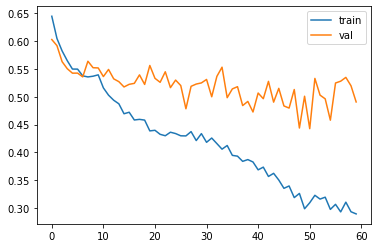

In [55]:
#plt.plot(train_metrics)
plt.plot(train_metrics['loss'])
plt.plot(val_metrics['loss'])
plt.legend(['train','val'])

In [22]:
PATH='C:/Users/marcb/Desktop/pytorch_models/weights/final/CBAMresnet50_mass_NAdam_run3_weights'
torch.save(model.state_dict(), PATH)
PATH='C:/Users/marcb/Desktop/pytorch_models/models/final/CBAMresnet50_mass_NAdam_run3_model'
torch.save(model, PATH)
# PATH='C:/Users/marcb/Desktop/pytorch_models/traintest_history/SEresnet50_200epoch_masss_baseline_train_data_SGD'
# torch.save(train_metrics,PATH)
# PATH='C:/Users/marcb/Desktop/pytorch_models/traintest_history/SEresnet50_20epoch_masss_baseline_eval_data_SGD'
# torch.save(val_metrics,PATH)

In [11]:
PATH_m='C:/Users/marcb/Desktop/pytorch_models/models/SEresnet50_NAdam_finalrun1_model'
PATH_w='C:/Users/marcb/Desktop/pytorch_models/weights/SEresnet50_NAdam_finalrun1_weights'
model = torch.load(PATH_m).eval()
# from torchvision.models import resnet50
# 
model.load_state_dict(torch.load(PATH_w),strict=False)

<All keys matched successfully>

In [30]:
#criterion = nn.BCELoss()


test_metrics = test_model(model, criterion,test_dataloader, threshold = .3)
wandb.finish() 

Starting testing...


100%|██████████| 12/12 [00:04<00:00,  2.73it/s]


New threshold is 0.524713397026062


Error: You must call wandb.init() before wandb.log()

In [30]:
import timm 

timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

# EfficientNet

In [24]:
import copy
import math
from dataclasses import dataclass
from functools import partial
from typing import Any, Callable, Dict, List, Optional, Sequence, Tuple, Union

import torch
from torch import nn, Tensor
from torchvision.ops import StochasticDepth

from torchvision.models._api import register_model, Weights, WeightsEnum
from torchvision.models._meta import _IMAGENET_CATEGORIES
from torchvision.models._utils import _make_divisible,_ovewrite_named_param, handle_legacy_interface

from torchvision.ops.misc import Conv2dNormActivation, SqueezeExcitation
from torchvision.transforms._presets import ImageClassification, InterpolationMode
from torchvision.utils import _log_api_usage_once



__all__ = [
    "EfficientNet",
    "EfficientNet_B0_Weights",
    "EfficientNet_B1_Weights",
    "EfficientNet_B2_Weights",
    "EfficientNet_B3_Weights",
    "EfficientNet_B4_Weights",
    "EfficientNet_B5_Weights",
    "EfficientNet_B6_Weights",
    "EfficientNet_B7_Weights",
    "EfficientNet_V2_S_Weights",
    "EfficientNet_V2_M_Weights",
    "EfficientNet_V2_L_Weights",
    "efficientnet_b0",
    "efficientnet_b1",
    "efficientnet_b2",
    "efficientnet_b3",
    "efficientnet_b4",
    "efficientnet_b5",
    "efficientnet_b6",
    "efficientnet_b7",
    "efficientnet_v2_s",
    "efficientnet_v2_m",
    "efficientnet_v2_l",
]


@dataclass
class _MBConvConfig:
    expand_ratio: float
    kernel: int
    stride: int
    input_channels: int
    out_channels: int
    num_layers: int
    block: Callable[..., nn.Module]

    @staticmethod
    def adjust_channels(channels: int, width_mult: float, min_value: Optional[int] = None) -> int:
        return _make_divisible(channels * width_mult, 8, min_value)


class MBConvConfig(_MBConvConfig):
    # Stores information listed at Table 1 of the EfficientNet paper & Table 4 of the EfficientNetV2 paper
    def __init__(
        self,
        expand_ratio: float,
        kernel: int,
        stride: int,
        input_channels: int,
        out_channels: int,
        num_layers: int,
        width_mult: float = 1.0,
        depth_mult: float = 1.0,
        block: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        input_channels = self.adjust_channels(input_channels, width_mult)
        out_channels = self.adjust_channels(out_channels, width_mult)
        num_layers = self.adjust_depth(num_layers, depth_mult)
        if block is None:
            block = MBConv
        super().__init__(expand_ratio, kernel, stride, input_channels, out_channels, num_layers, block)

    @staticmethod
    def adjust_depth(num_layers: int, depth_mult: float):
        return int(math.ceil(num_layers * depth_mult))


class FusedMBConvConfig(_MBConvConfig):
    # Stores information listed at Table 4 of the EfficientNetV2 paper
    def __init__(
        self,
        expand_ratio: float,
        kernel: int,
        stride: int,
        input_channels: int,
        out_channels: int,
        num_layers: int,
        block: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        if block is None:
            block = FusedMBConv
        super().__init__(expand_ratio, kernel, stride, input_channels, out_channels, num_layers, block)


class MBConv(nn.Module):
    def __init__(
        self,
        cnf: MBConvConfig,
        stochastic_depth_prob: float,
        norm_layer: Callable[..., nn.Module],
        se_layer: Callable[..., nn.Module] = SqueezeExcitation,
    ) -> None:
        super().__init__()

        if not (1 <= cnf.stride <= 2):
            raise ValueError("illegal stride value")

        self.use_res_connect = cnf.stride == 1 and cnf.input_channels == cnf.out_channels

        layers: List[nn.Module] = []
        activation_layer = nn.SiLU

        # expand
        expanded_channels = cnf.adjust_channels(cnf.input_channels, cnf.expand_ratio)
        if expanded_channels != cnf.input_channels:
            layers.append(
                Conv2dNormActivation(
                    cnf.input_channels,
                    expanded_channels,
                    kernel_size=1,
                    norm_layer=norm_layer,
                    activation_layer=activation_layer,
                )
            )

        # depthwise
        layers.append(
            Conv2dNormActivation(
                expanded_channels,
                expanded_channels,
                kernel_size=cnf.kernel,
                stride=cnf.stride,
                groups=expanded_channels,
                norm_layer=norm_layer,
                activation_layer=activation_layer,
            )
        )

        # squeeze and excitation
        squeeze_channels = max(1, cnf.input_channels // 4)
        layers.append(se_layer(expanded_channels, squeeze_channels, activation=partial(nn.SiLU, inplace=True)))

        # project
        layers.append(
            Conv2dNormActivation(
                expanded_channels, cnf.out_channels, kernel_size=1, norm_layer=norm_layer, activation_layer=None
            )
        )

        self.block = nn.Sequential(*layers)
        self.stochastic_depth = StochasticDepth(stochastic_depth_prob, "row")
        self.out_channels = cnf.out_channels

    def forward(self, input: Tensor) -> Tensor:
        result = self.block(input)
        if self.use_res_connect:
            result = self.stochastic_depth(result)
            result += input
        return result


class FusedMBConv(nn.Module):
    def __init__(
        self,
        cnf: FusedMBConvConfig,
        stochastic_depth_prob: float,
        norm_layer: Callable[..., nn.Module],
    ) -> None:
        super().__init__()

        if not (1 <= cnf.stride <= 2):
            raise ValueError("illegal stride value")

        self.use_res_connect = cnf.stride == 1 and cnf.input_channels == cnf.out_channels

        layers: List[nn.Module] = []
        activation_layer = nn.SiLU

        expanded_channels = cnf.adjust_channels(cnf.input_channels, cnf.expand_ratio)
        if expanded_channels != cnf.input_channels:
            # fused expand
            layers.append(
                Conv2dNormActivation(
                    cnf.input_channels,
                    expanded_channels,
                    kernel_size=cnf.kernel,
                    stride=cnf.stride,
                    norm_layer=norm_layer,
                    activation_layer=activation_layer,
                )
            )

            # project
            layers.append(
                Conv2dNormActivation(
                    expanded_channels, cnf.out_channels, kernel_size=1, norm_layer=norm_layer, activation_layer=None
                )
            )
        else:
            layers.append(
                Conv2dNormActivation(
                    cnf.input_channels,
                    cnf.out_channels,
                    kernel_size=cnf.kernel,
                    stride=cnf.stride,
                    norm_layer=norm_layer,
                    activation_layer=activation_layer,
                )
            )

        self.block = nn.Sequential(*layers)
        self.stochastic_depth = StochasticDepth(stochastic_depth_prob, "row")
        self.out_channels = cnf.out_channels

    def forward(self, input: Tensor) -> Tensor:
        result = self.block(input)
        if self.use_res_connect:
            result = self.stochastic_depth(result)
            result += input
        return result


class EfficientNet(nn.Module):
    def __init__(
        self,
        inverted_residual_setting: Sequence[Union[MBConvConfig, FusedMBConvConfig]],
        dropout: float,
        stochastic_depth_prob: float = 0.2,
        num_classes: int = 1000,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
        last_channel: Optional[int] = None,
    ) -> None:
        """
        EfficientNet V1 and V2 main class
        Args:
            inverted_residual_setting (Sequence[Union[MBConvConfig, FusedMBConvConfig]]): Network structure
            dropout (float): The droupout probability
            stochastic_depth_prob (float): The stochastic depth probability
            num_classes (int): Number of classes
            norm_layer (Optional[Callable[..., nn.Module]]): Module specifying the normalization layer to use
            last_channel (int): The number of channels on the penultimate layer
        """
        super().__init__()
        _log_api_usage_once(self)

        if not inverted_residual_setting:
            raise ValueError("The inverted_residual_setting should not be empty")
        elif not (
            isinstance(inverted_residual_setting, Sequence)
            and all([isinstance(s, _MBConvConfig) for s in inverted_residual_setting])
        ):
            raise TypeError("The inverted_residual_setting should be List[MBConvConfig]")

        if norm_layer is None:
            norm_layer = nn.BatchNorm2d

        layers: List[nn.Module] = []

        # building first layer
        firstconv_output_channels = inverted_residual_setting[0].input_channels
        layers.append(
            Conv2dNormActivation(
                3, firstconv_output_channels, kernel_size=3, stride=2, norm_layer=norm_layer, activation_layer=nn.SiLU
            )
        )

        # building inverted residual blocks
        total_stage_blocks = sum(cnf.num_layers for cnf in inverted_residual_setting)
        stage_block_id = 0
        for cnf in inverted_residual_setting:
            stage: List[nn.Module] = []
            for _ in range(cnf.num_layers):
                # copy to avoid modifications. shallow copy is enough
                block_cnf = copy.copy(cnf)

                # overwrite info if not the first conv in the stage
                if stage:
                    block_cnf.input_channels = block_cnf.out_channels
                    block_cnf.stride = 1

                # adjust stochastic depth probability based on the depth of the stage block
                sd_prob = stochastic_depth_prob * float(stage_block_id) / total_stage_blocks

                stage.append(block_cnf.block(block_cnf, sd_prob, norm_layer))
                stage_block_id += 1

            layers.append(nn.Sequential(*stage))

        # building last several layers
        lastconv_input_channels = inverted_residual_setting[-1].out_channels
        lastconv_output_channels = last_channel if last_channel is not None else 4 * lastconv_input_channels
        layers.append(
            Conv2dNormActivation(
                lastconv_input_channels,
                lastconv_output_channels,
                kernel_size=1,
                norm_layer=norm_layer,
                activation_layer=nn.SiLU,
            )
        )

        self.features = nn.Sequential(*layers)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout, inplace=True),
            nn.Linear(lastconv_output_channels, num_classes),
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                init_range = 1.0 / math.sqrt(m.out_features)
                nn.init.uniform_(m.weight, -init_range, init_range)
                nn.init.zeros_(m.bias)

    def _forward_impl(self, x: Tensor) -> Tensor:
        x = self.features(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        x = self.classifier(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _efficientnet(
    inverted_residual_setting: Sequence[Union[MBConvConfig, FusedMBConvConfig]],
    dropout: float,
    last_channel: Optional[int],
    weights: Optional[WeightsEnum],
    progress: bool,
    **kwargs: Any,
) -> EfficientNet:
    if weights is not None:
        _ovewrite_named_param(kwargs, "num_classes", len(weights.meta["categories"]))

    model = EfficientNet(inverted_residual_setting, dropout, last_channel=last_channel, **kwargs)

    if weights is not None:
        model.load_state_dict(weights.get_state_dict(progress=progress))

    return model


def _efficientnet_conf(
    arch: str,
    **kwargs: Any,
) -> Tuple[Sequence[Union[MBConvConfig, FusedMBConvConfig]], Optional[int]]:
    inverted_residual_setting: Sequence[Union[MBConvConfig, FusedMBConvConfig]]
    if arch.startswith("efficientnet_b"):
        bneck_conf = partial(MBConvConfig, width_mult=kwargs.pop("width_mult"), depth_mult=kwargs.pop("depth_mult"))
        inverted_residual_setting = [
            bneck_conf(1, 3, 1, 32, 16, 1),
            bneck_conf(6, 3, 2, 16, 24, 2),
            bneck_conf(6, 5, 2, 24, 40, 2),
            bneck_conf(6, 3, 2, 40, 80, 3),
            bneck_conf(6, 5, 1, 80, 112, 3),
            bneck_conf(6, 5, 2, 112, 192, 4),
            bneck_conf(6, 3, 1, 192, 320, 1),
        ]
        last_channel = None
    elif arch.startswith("efficientnet_v2_s"):
        inverted_residual_setting = [
            FusedMBConvConfig(1, 3, 1, 24, 24, 2),
            FusedMBConvConfig(4, 3, 2, 24, 48, 4),
            FusedMBConvConfig(4, 3, 2, 48, 64, 4),
            MBConvConfig(4, 3, 2, 64, 128, 6),
            MBConvConfig(6, 3, 1, 128, 160, 9),
            MBConvConfig(6, 3, 2, 160, 256, 15),
        ]
        last_channel = 1280
    elif arch.startswith("efficientnet_v2_m"):
        inverted_residual_setting = [
            FusedMBConvConfig(1, 3, 1, 24, 24, 3),
            FusedMBConvConfig(4, 3, 2, 24, 48, 5),
            FusedMBConvConfig(4, 3, 2, 48, 80, 5),
            MBConvConfig(4, 3, 2, 80, 160, 7),
            MBConvConfig(6, 3, 1, 160, 176, 14),
            MBConvConfig(6, 3, 2, 176, 304, 18),
            MBConvConfig(6, 3, 1, 304, 512, 5),
        ]
        last_channel = 1280
    elif arch.startswith("efficientnet_v2_l"):
        inverted_residual_setting = [
            FusedMBConvConfig(1, 3, 1, 32, 32, 4),
            FusedMBConvConfig(4, 3, 2, 32, 64, 7),
            FusedMBConvConfig(4, 3, 2, 64, 96, 7),
            MBConvConfig(4, 3, 2, 96, 192, 10),
            MBConvConfig(6, 3, 1, 192, 224, 19),
            MBConvConfig(6, 3, 2, 224, 384, 25),
            MBConvConfig(6, 3, 1, 384, 640, 7),
        ]
        last_channel = 1280
    else:
        raise ValueError(f"Unsupported model type {arch}")

    return inverted_residual_setting, last_channel


_COMMON_META: Dict[str, Any] = {
    "categories": _IMAGENET_CATEGORIES,
}


_COMMON_META_V1 = {
    **_COMMON_META,
    "min_size": (1, 1),
    "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1",
}


_COMMON_META_V2 = {
    **_COMMON_META,
    "min_size": (33, 33),
    "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v2",
}


class EfficientNet_B0_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/rwightman/pytorch-image-models/
        url="https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth",
        transforms=partial(
            ImageClassification, crop_size=224, resize_size=256, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 5288548,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 77.692,
                    "acc@5": 93.532,
                }
            },
            "_ops": 0.386,
            "_file_size": 20.451,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B1_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/rwightman/pytorch-image-models/
        url="https://download.pytorch.org/models/efficientnet_b1_rwightman-533bc792.pth",
        transforms=partial(
            ImageClassification, crop_size=240, resize_size=256, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 7794184,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 78.642,
                    "acc@5": 94.186,
                }
            },
            "_ops": 0.687,
            "_file_size": 30.134,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    IMAGENET1K_V2 = Weights(
        url="https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth",
        transforms=partial(
            ImageClassification, crop_size=240, resize_size=255, interpolation=InterpolationMode.BILINEAR
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 7794184,
            "recipe": "https://github.com/pytorch/vision/issues/3995#new-recipe-with-lr-wd-crop-tuning",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 79.838,
                    "acc@5": 94.934,
                }
            },
            "_ops": 0.687,
            "_file_size": 30.136,
            "_docs": """
                These weights improve upon the results of the original paper by using a modified version of TorchVision's
                `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V2


class EfficientNet_B2_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/rwightman/pytorch-image-models/
        url="https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth",
        transforms=partial(
            ImageClassification, crop_size=288, resize_size=288, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 9109994,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 80.608,
                    "acc@5": 95.310,
                }
            },
            "_ops": 1.088,
            "_file_size": 35.174,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B3_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/rwightman/pytorch-image-models/
        url="https://download.pytorch.org/models/efficientnet_b3_rwightman-cf984f9c.pth",
        transforms=partial(
            ImageClassification, crop_size=300, resize_size=320, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 12233232,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 82.008,
                    "acc@5": 96.054,
                }
            },
            "_ops": 1.827,
            "_file_size": 47.184,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B4_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/rwightman/pytorch-image-models/
        url="https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth",
        transforms=partial(
            ImageClassification, crop_size=380, resize_size=384, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 19341616,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 83.384,
                    "acc@5": 96.594,
                }
            },
            "_ops": 4.394,
            "_file_size": 74.489,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B5_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/lukemelas/EfficientNet-PyTorch/
        url="https://download.pytorch.org/models/efficientnet_b5_lukemelas-b6417697.pth",
        transforms=partial(
            ImageClassification, crop_size=456, resize_size=456, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 30389784,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 83.444,
                    "acc@5": 96.628,
                }
            },
            "_ops": 10.266,
            "_file_size": 116.864,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B6_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/lukemelas/EfficientNet-PyTorch/
        url="https://download.pytorch.org/models/efficientnet_b6_lukemelas-c76e70fd.pth",
        transforms=partial(
            ImageClassification, crop_size=528, resize_size=528, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 43040704,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 84.008,
                    "acc@5": 96.916,
                }
            },
            "_ops": 19.068,
            "_file_size": 165.362,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_B7_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        # Weights ported from https://github.com/lukemelas/EfficientNet-PyTorch/
        url="https://download.pytorch.org/models/efficientnet_b7_lukemelas-dcc49843.pth",
        transforms=partial(
            ImageClassification, crop_size=600, resize_size=600, interpolation=InterpolationMode.BICUBIC
        ),
        meta={
            **_COMMON_META_V1,
            "num_params": 66347960,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 84.122,
                    "acc@5": 96.908,
                }
            },
            "_ops": 37.746,
            "_file_size": 254.675,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_V2_S_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth",
        transforms=partial(
            ImageClassification,
            crop_size=384,
            resize_size=384,
            interpolation=InterpolationMode.BILINEAR,
        ),
        meta={
            **_COMMON_META_V2,
            "num_params": 21458488,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 84.228,
                    "acc@5": 96.878,
                }
            },
            "_ops": 8.366,
            "_file_size": 82.704,
            "_docs": """
                These weights improve upon the results of the original paper by using a modified version of TorchVision's
                `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_V2_M_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth",
        transforms=partial(
            ImageClassification,
            crop_size=480,
            resize_size=480,
            interpolation=InterpolationMode.BILINEAR,
        ),
        meta={
            **_COMMON_META_V2,
            "num_params": 54139356,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 85.112,
                    "acc@5": 97.156,
                }
            },
            "_ops": 24.582,
            "_file_size": 208.01,
            "_docs": """
                These weights improve upon the results of the original paper by using a modified version of TorchVision's
                `new training recipe
                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.
            """,
        },
    )
    DEFAULT = IMAGENET1K_V1


class EfficientNet_V2_L_Weights(WeightsEnum):
    # Weights ported from https://github.com/google/automl/tree/master/efficientnetv2
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/efficientnet_v2_l-59c71312.pth",
        transforms=partial(
            ImageClassification,
            crop_size=480,
            resize_size=480,
            interpolation=InterpolationMode.BICUBIC,
            mean=(0.5, 0.5, 0.5),
            std=(0.5, 0.5, 0.5),
        ),
        meta={
            **_COMMON_META_V2,
            "num_params": 118515272,
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 85.808,
                    "acc@5": 97.788,
                }
            },
            "_ops": 56.08,
            "_file_size": 454.573,
            "_docs": """These weights are ported from the original paper.""",
        },
    )
    DEFAULT = IMAGENET1K_V1


@handle_legacy_interface(weights=("pretrained", EfficientNet_B0_Weights.IMAGENET1K_V1))
def efficientnet_b0(
    *, weights: Optional[EfficientNet_B0_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B0 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B0_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B0_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B0_Weights
        :members:
    """
    weights = EfficientNet_B0_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b0", width_mult=1.0, depth_mult=1.0)
    return _efficientnet(
        inverted_residual_setting, kwargs.pop("dropout", 0.2), last_channel, weights, progress, **kwargs
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B1_Weights.IMAGENET1K_V1))
def efficientnet_b1(
    *, weights: Optional[EfficientNet_B1_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B1 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B1_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B1_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B1_Weights
        :members:
    """
    weights = EfficientNet_B1_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b1", width_mult=1.0, depth_mult=1.1)
    return _efficientnet(
        inverted_residual_setting, kwargs.pop("dropout", 0.2), last_channel, weights, progress, **kwargs
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B2_Weights.IMAGENET1K_V1))
def efficientnet_b2(
    *, weights: Optional[EfficientNet_B2_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B2 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B2_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B2_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B2_Weights
        :members:
    """
    weights = EfficientNet_B2_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b2", width_mult=1.1, depth_mult=1.2)
    return _efficientnet(
        inverted_residual_setting, kwargs.pop("dropout", 0.3), last_channel, weights, progress, **kwargs
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B3_Weights.IMAGENET1K_V1))
def efficientnet_b3(
    *, weights: Optional[EfficientNet_B3_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B3 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B3_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B3_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B3_Weights
        :members:
    """
    weights = EfficientNet_B3_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b3", width_mult=1.2, depth_mult=1.4)
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.3),
        last_channel,
        weights,
        progress,
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B4_Weights.IMAGENET1K_V1))
def efficientnet_b4(
    *, weights: Optional[EfficientNet_B4_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B4 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B4_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B4_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B4_Weights
        :members:
    """
    weights = EfficientNet_B4_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b4", width_mult=1.4, depth_mult=1.8)
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.4),
        last_channel,
        weights,
        progress,
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B5_Weights.IMAGENET1K_V1))
def efficientnet_b5(
    *, weights: Optional[EfficientNet_B5_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B5 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B5_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B5_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B5_Weights
        :members:
    """
    weights = EfficientNet_B5_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b5", width_mult=1.6, depth_mult=2.2)
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.4),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=0.001, momentum=0.01),
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B6_Weights.IMAGENET1K_V1))
def efficientnet_b6(
    *, weights: Optional[EfficientNet_B6_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B6 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B6_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B6_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B6_Weights
        :members:
    """
    weights = EfficientNet_B6_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b6", width_mult=1.8, depth_mult=2.6)
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.5),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=0.001, momentum=0.01),
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_B7_Weights.IMAGENET1K_V1))
def efficientnet_b7(
    *, weights: Optional[EfficientNet_B7_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """EfficientNet B7 model architecture from the `EfficientNet: Rethinking Model Scaling for Convolutional
    Neural Networks <https://arxiv.org/abs/1905.11946>`_ paper.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_B7_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_B7_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_B7_Weights
        :members:
    """
    weights = EfficientNet_B7_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_b7", width_mult=2.0, depth_mult=3.1)
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.5),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=0.001, momentum=0.01),
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_V2_S_Weights.IMAGENET1K_V1))
def efficientnet_v2_s(
    *, weights: Optional[EfficientNet_V2_S_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """
    Constructs an EfficientNetV2-S architecture from
    `EfficientNetV2: Smaller Models and Faster Training <https://arxiv.org/abs/2104.00298>`_.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_V2_S_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_V2_S_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_V2_S_Weights
        :members:
    """
    weights = EfficientNet_V2_S_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_v2_s")
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.2),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=1e-03),
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_V2_M_Weights.IMAGENET1K_V1))
def efficientnet_v2_m(
    *, weights: Optional[EfficientNet_V2_M_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """
    Constructs an EfficientNetV2-M architecture from
    `EfficientNetV2: Smaller Models and Faster Training <https://arxiv.org/abs/2104.00298>`_.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_V2_M_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_V2_M_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_V2_M_Weights
        :members:
    """
    weights = EfficientNet_V2_M_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_v2_m")
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.3),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=1e-03),
        **kwargs,
    )


@handle_legacy_interface(weights=("pretrained", EfficientNet_V2_L_Weights.IMAGENET1K_V1))
def efficientnet_v2_l(
    *, weights: Optional[EfficientNet_V2_L_Weights] = None, progress: bool = True, **kwargs: Any
) -> EfficientNet:
    """
    Constructs an EfficientNetV2-L architecture from
    `EfficientNetV2: Smaller Models and Faster Training <https://arxiv.org/abs/2104.00298>`_.
    Args:
        weights (:class:`~torchvision.models.EfficientNet_V2_L_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.EfficientNet_V2_L_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.efficientnet.EfficientNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/efficientnet.py>`_
            for more details about this class.
    .. autoclass:: torchvision.models.EfficientNet_V2_L_Weights
        :members:
    """
    weights = EfficientNet_V2_L_Weights.verify(weights)

    inverted_residual_setting, last_channel = _efficientnet_conf("efficientnet_v2_l")
    return _efficientnet(
        inverted_residual_setting,
        kwargs.pop("dropout", 0.4),
        last_channel,
        weights,
        progress,
        norm_layer=partial(nn.BatchNorm2d, eps=1e-03),
        **kwargs,
    )

In [14]:
model = efficientnet_v2_s(weights='DEFAULT')

model = nn.Sequential(
    model,
    nn.Linear(1000,1)
    nn.Softmax(1)
)


Sequential(
  (0): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): FusedMBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(24, eps